In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sparse

# Nd sparse tensors with Sparse

In [2]:
x = np.random.random((400, 50, 50))

In [3]:
x[x < 0.9] = 0

In [4]:
x.nbytes/10**6

8.0

In [5]:
s = sparse.COO(x)

In [6]:
type(s)

sparse._coo.core.COO

In [7]:
s.nbytes/10**6

3.217408

In [8]:
s

Format,coo
Data Type,float64
Shape,"(400, 50, 50)"
nnz,100544
Density,0.100544
Read-only,True
Size,3.1M
Storage ratio,0.4


In [9]:
s.data.nbytes/10**6

0.804352

In [10]:
s.coords.nbytes/10**6

2.413056

In [11]:
del(x,s)

In [12]:
densidad = np.linspace(0.0,0.5,100)
ratios_coo = []
ratios_dok = []

for ii in densidad:
    x = np.random.random((400, 50, 50))
    x[x < 1.0-ii] = 0
    s = sparse.COO(x)
    ratio = s.nbytes/(s.dtype.itemsize*s.size)
    ratios_coo.append(ratio)
    s = sparse.DOK(x)
    ratio = s.nbytes/(s.dtype.itemsize*s.size)
    ratios_dok.append(ratio)

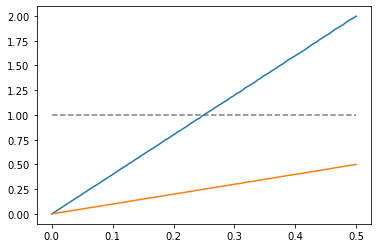

In [13]:
plt.plot(densidad,ratios_coo)
plt.plot(densidad,ratios_dok)
plt.hlines(1.0, 0.0, 0.5, colors='gray', linestyles='dashed')

In [31]:
x = np.random.random((400, 50, 50))
x[x < 0.9] = 0
s = sparse.COO(x)

In [32]:
s[:,0,:]

Format,coo
Data Type,float64
Shape,"(400, 50)"
nnz,2053
Density,0.10265
Read-only,True
Size,48.1K
Storage ratio,0.3


In [33]:
x.sum()

94671.48936778189

In [19]:
x = np.random.random((400, 50, 50))
x[x < 0.9] = 0
s = sparse.DOK(x)

In [21]:
s[0,:,:]

Format,dok
Data Type,float64
Shape,"(50, 50)"
nnz,253
Density,0.1012
Read-only,False
Size,2.0K
Storage ratio,0.1


In [26]:
np.sum(s[0,3,:].todense())

4.696289109818416

In [30]:
help(s.sum)

Help on method sum in module sparse._sparse_array:

sum(axis=None, keepdims=False, dtype=None, out=None) method of sparse._dok.DOK instance
    Performs a sum operation along the given axes. Uses all axes by default.
    
    Parameters
    ----------
    axis : Union[int, Iterable[int]], optional
        The axes along which to sum. Uses all axes by default.
    keepdims : bool, optional
        Whether or not to keep the dimensions of the original array.
    dtype: numpy.dtype
        The data type of the output array.
    
    Returns
    -------
    SparseArray
        The reduced output sparse array.
    
    See Also
    --------
    :obj:`numpy.sum` : Equivalent numpy function.
    scipy.sparse.coo_matrix.sum : Equivalent Scipy function.



## Boolean

In [ ]:
x = np.random.choice([True, False], size=[400, 50, 50], p=[0.01, 0.99])

In [ ]:
x.nbytes/10**6

In [ ]:
s = sparse.COO(x)

In [ ]:
s.nbytes/10**6

In [ ]:
s

In [ ]:
s.data.nbytes/10**6

In [ ]:
s.coords.nbytes/10**6

In [ ]:
densidad = np.linspace(0.0,0.5,100)
ratios_coo = []
ratios_dok = []

for ii in densidad:
    x = np.random.choice([True, False], size=[400, 50, 50], p=[ii, 1.0-ii])
    s = sparse.COO(x)
    ratio = s.nbytes/(s.dtype.itemsize*s.size)
    ratios_coo.append(ratio)
    s = sparse.DOK(x)
    ratio = s.nbytes/(s.dtype.itemsize*s.size)
    ratios_dok.append(ratio)

In [ ]:
plt.plot(densidad,ratios_coo)
plt.plot(densidad,ratios_dok)
plt.hlines(1.0, 0.0, 0.5, colors='gray', linestyles='dashed')